<a href="https://colab.research.google.com/github/basunepal/Feature-Engineering-and-Visualization/blob/main/Airbnb_NYC_Listings_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Airbnb NYC Listings Analysis

The goal of this project is to analyze Airbnb listings in New York City to predict prices effectively by engineering meaningful features and utilizing advanced visualization techniques. By understanding the data better through visualization and feature extraction, we aim to enhance model performance and provide actionable insights for pricing strategies.

Objective:

- Understanding the Dataset
- Creating new features
- Data Visualization
- Model Training and Prediction
- Evaluate model performance using RMSE and R-squared
- Feature Importance Analysis

Dataset

Source: [Airbnb NYC Listings](https://www.kaggle.com/datasets/dgomonov/new-york-city-airbnb-open-data)

## 1. Data Loading and Initial Exploration

- Load the Airbnb NYC dataset.
- Display basic information about the dataset (e.g., column names, data types, and sample rows).
- Generate summary statistics

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Load the dataset
df = pd.read_csv("nyc_data.csv")

In [3]:
# Display basic information
print("Dataset Shape:", df.shape)
print("Columns:", df.columns)
df.head()

Dataset Shape: (48895, 16)
Columns: Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [4]:
# Display summary statistics
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


## 2. Data Preprocessing

- Handle missing data using imputation or dropping irrelevant rows/columns.
- Convert categorical variables into numerical representations (e.g., one-hot encoding).
- Standardize numerical features to ensure consistent scaling.
- Remove or treat outliers in price and other numerical features.

In [5]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values[missing_values > 0])

Missing Values:
 name                    16
host_name               21
last_review          10052
reviews_per_month    10052
dtype: int64


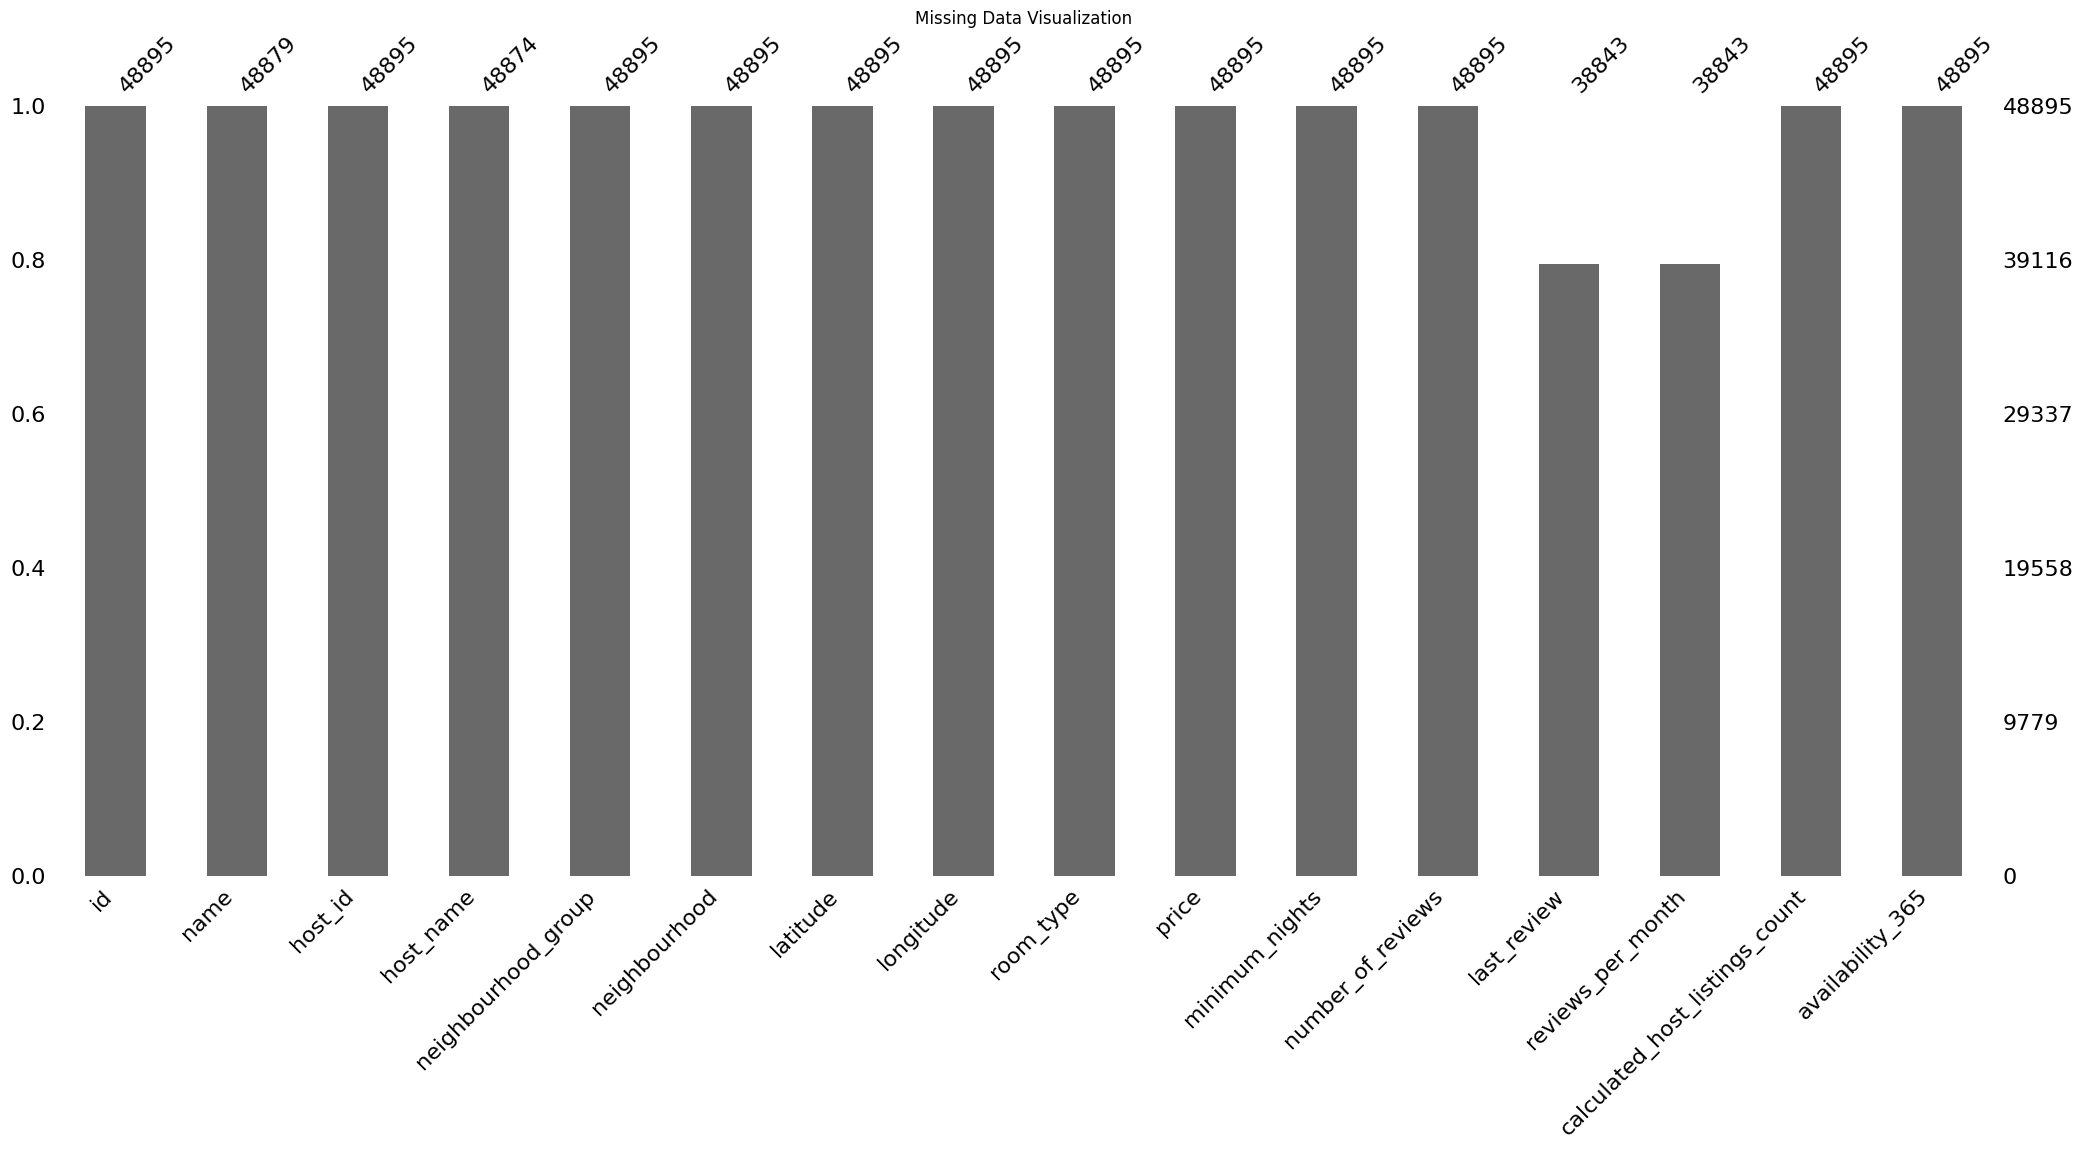

In [6]:
# Visualize missing data
import missingno as msno
msno.bar(df)
plt.title('Missing Data Visualization')
plt.show()

In [7]:
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [8]:
# Fill in the missing data
df['reviews_per_month'].describe()
mean = df['reviews_per_month'].mean()
df['reviews_per_month'] = df['reviews_per_month'].fillna(mean)
df['reviews_per_month'] = df['reviews_per_month'].fillna(df['last_review'].mode())
df


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.210000,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.380000,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1.373221,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.640000,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.100000,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,1.373221,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,1.373221,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,1.373221,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,1.373221,6,2


In [9]:
# Identify categorical and numerical features
categorical_cols = df.select_dtypes(include=['object']).columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
print("Categorical Columns:", categorical_cols)
print("Numerical Columns:", numerical_cols)

Categorical Columns: Index(['name', 'host_name', 'neighbourhood_group', 'neighbourhood',
       'room_type', 'last_review'],
      dtype='object')
Numerical Columns: Index(['id', 'host_id', 'latitude', 'longitude', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')


In [10]:
# Convert 'price' to numeric
df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)

In [11]:
# Encode categorical variables
df = pd.get_dummies(df, columns=['room_type', 'neighbourhood', 'neighbourhood_group'], drop_first=True)

In [12]:
# Drop irrelevant columns
df = df.drop(['id', 'host_id', 'name', 'host_name'], axis=1)

In [13]:
df

,latitude,longitude,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,room_type_Private room,...,neighbourhood_Willowbrook,neighbourhood_Windsor Terrace,neighbourhood_Woodhaven,neighbourhood_Woodlawn,neighbourhood_Woodrow,neighbourhood_Woodside,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island
0,40.64749,-73.97237,149.0,1,9,2018-10-19,0.210000,6,365,True,...,False,False,False,False,False,False,True,False,False,False
1,40.75362,-73.98377,225.0,1,45,2019-05-21,0.380000,2,355,False,...,False,False,False,False,False,False,False,True,False,False
2,40.80902,-73.94190,150.0,3,0,NaN,1.373221,1,365,True,...,False,False,False,False,False,False,False,True,False,False
3,40.68514,-73.95976,89.0,1,270,2019-07-05,4.640000,1,194,False,...,False,False,False,False,False,False,True,False,False,False
4,40.79851,-73.94399,80.0,10,9,2018-11-19,0.100000,1,0,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,40.67853,-73.94995,70.0,2,0,NaN,1.373221,2,9,True,...,False,False,False,False,False,False,True,False,False,False
48891,40.70184,-73.93317,40.0,4,0,NaN,1.373221,2,36,True,...,False,False,False,False,False,False,True,False,False,False
48892,40.81475,-73.94867,115.0,10,0,NaN,1.373221,1,27,False,...,False,False,False,False,False,False,False,True,False,False
48893,40.75751,-73.99112,55.0,1,0,NaN,1.373221,6,2,False,...,False,False,False,False,False,False,False,True,False,False


In [14]:
# Standardize numerical features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numerical_cols = ['price', 'latitude', 'longitude', 'minimum_nights', 'number_of_reviews']
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

df.head()

,latitude,longitude,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,room_type_Private room,...,neighbourhood_Willowbrook,neighbourhood_Windsor Terrace,neighbourhood_Woodhaven,neighbourhood_Woodlawn,neighbourhood_Woodrow,neighbourhood_Woodside,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island
0,-1.493849,-0.437652,-0.015493,-0.293996,-0.320414,2018-10-19,0.210000,6,365,True,...,False,False,False,False,False,False,True,False,False,False
1,0.452436,-0.684639,0.300974,-0.293996,0.487665,2019-05-21,0.380000,2,355,False,...,False,False,False,False,False,False,False,True,False,False
2,1.468399,0.222497,-0.011329,-0.196484,-0.522433,NaN,1.373221,1,365,True,...,False,False,False,False,False,False,False,True,False,False
3,-0.803398,-0.164450,-0.265335,-0.293996,5.538156,2019-07-05,4.640000,1,194,False,...,False,False,False,False,False,False,True,False,False,False
4,1.275660,0.177216,-0.302811,0.144807,-0.320414,2018-11-19,0.100000,1,0,False,...,False,False,False,False,False,False,False,True,False,False


In [15]:
df.describe()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,4.889500e+04,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000
mean,3.926898e-14,1.660974e-13,3.720195e-17,1.104433e-17,1.860098e-17,1.373221,7.143982,112.781327
std,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.497775,32.952519,131.622289
min,-4.202474e+00,-6.331760e+00,-6.359342e-01,-2.939962e-01,-5.224332e-01,0.010000,1.000000,0.000000
25%,-7.124376e-01,-6.694733e-01,-3.486158e-01,-2.939962e-01,-4.999866e-01,0.280000,1.000000,0.000000
50%,-1.078110e-01,-7.605436e-02,-1.945465e-01,-1.964844e-01,-4.102001e-01,1.220000,1.000000,45.000000
75%,6.265619e-01,3.443653e-01,9.277183e-02,-9.897262e-02,1.628580e-02,1.580000,2.000000,227.000000
max,3.376357e+00,5.181954e+00,4.100441e+01,6.060212e+01,1.359649e+01,58.500000,327.000000,365.000000


## 3. Feature Engineering

- Add new features
- Transform date-based columns

In [16]:
# Engineer new features
df['availability_percentage'] = df['availability_365'] / 365
df['luxury_indicator'] = (df['price'] > df['price'].quantile(0.75)).astype(int)

In [17]:
# Drop rows with extreme outliers
df = df[df['price'] < df['price'].quantile(0.99)]

In [18]:
# Extract temporal features (e.g., from reviews)
if 'last_review' in df.columns:
    df['last_review'] = pd.to_datetime(df['last_review'])
    df['last_review_year'] = df['last_review'].dt.year.fillna(df['last_review'].dt.year.median()).astype(int)

df = df.drop(['last_review'],axis=1)
df.head()

<ipython-input-18-45c935b99cda>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['last_review'] = pd.to_datetime(df['last_review'])
<ipython-input-18-45c935b99cda>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['last_review_year'] = df['last_review'].dt.year.fillna(df['last_review'].dt.year.median()).astype(int)


,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,room_type_Private room,room_type_Shared room,...,neighbourhood_Woodlawn,neighbourhood_Woodrow,neighbourhood_Woodside,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,availability_percentage,luxury_indicator,last_review_year
0,-1.493849,-0.437652,-0.015493,-0.293996,-0.320414,0.210000,6,365,True,False,...,False,False,False,True,False,False,False,1.000000,0,2018
1,0.452436,-0.684639,0.300974,-0.293996,0.487665,0.380000,2,355,False,False,...,False,False,False,False,True,False,False,0.972603,1,2019
2,1.468399,0.222497,-0.011329,-0.196484,-0.522433,1.373221,1,365,True,False,...,False,False,False,False,True,False,False,1.000000,0,2019
3,-0.803398,-0.164450,-0.265335,-0.293996,5.538156,4.640000,1,194,False,False,...,False,False,False,True,False,False,False,0.531507,0,2019
4,1.275660,0.177216,-0.302811,0.144807,-0.320414,0.100000,1,0,False,False,...,False,False,False,False,True,False,False,0.000000,0,2018


## 4. Exploratory Data Analysis (EDA)


- Generate histograms for key numerical features (e.g., price, reviews, and availability).
- Use scatterplots to explore relationships (e.g., price vs. location, price vs. room type).
- Create a heatmap to visualize correlations among numerical features.
- Create maps to visualize spatial patterns in listings and prices.

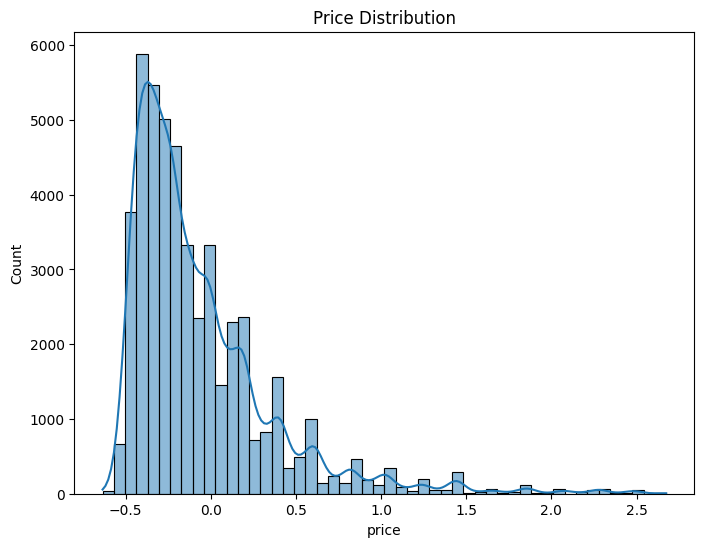

In [19]:
# Visualize price distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['price'], bins=50, kde=True)
plt.title('Price Distribution')
plt.show()

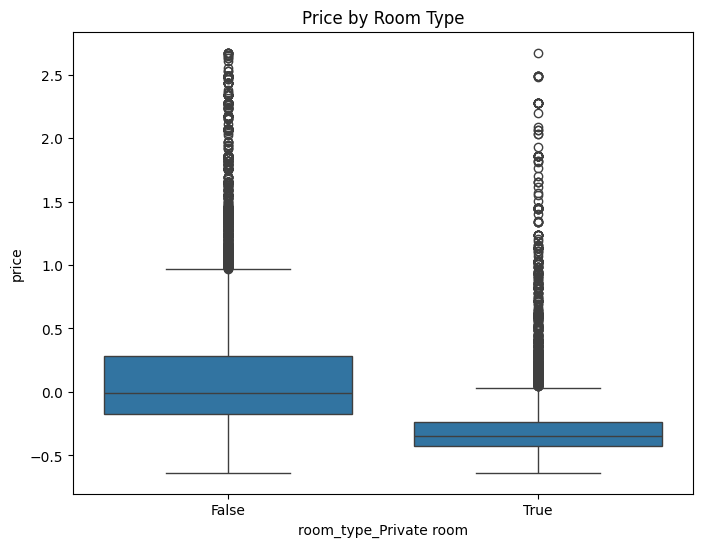

In [20]:
# Visualize price by room type
plt.figure(figsize=(8, 6))
sns.boxplot(x='room_type_Private room', y='price', data=df)
plt.title('Price by Room Type')
plt.show()

Since we have dummy encoded the categorical variable, if we plot the correlation matrix in the current state, it won't give the desired result so we must plot it separately.

In [21]:
df['neighbourhood_Arverne'].dtype

dtype('bool')

In [22]:
#Find the columns with dummy encodings
dummy_cols = df.select_dtypes(include='bool').columns
dummy_cols

Index(['room_type_Private room', 'room_type_Shared room',
       'neighbourhood_Arden Heights', 'neighbourhood_Arrochar',
       'neighbourhood_Arverne', 'neighbourhood_Astoria',
       'neighbourhood_Bath Beach', 'neighbourhood_Battery Park City',
       'neighbourhood_Bay Ridge', 'neighbourhood_Bay Terrace',
       ...
       'neighbourhood_Willowbrook', 'neighbourhood_Windsor Terrace',
       'neighbourhood_Woodhaven', 'neighbourhood_Woodlawn',
       'neighbourhood_Woodrow', 'neighbourhood_Woodside',
       'neighbourhood_group_Brooklyn', 'neighbourhood_group_Manhattan',
       'neighbourhood_group_Queens', 'neighbourhood_group_Staten Island'],
      dtype='object', length=226)

In [23]:
#Correlation matric without dummy encoded variables
corr_matrix = df.drop(columns=dummy_cols).corr()
corr_matrix

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,availability_percentage,luxury_indicator,last_review_year
latitude,1.000000,0.085461,0.066749,0.025120,-0.015091,-0.008952,0.019553,-0.011656,-0.011656,0.055598,-0.010266
longitude,0.085461,1.000000,-0.274405,-0.064323,0.057668,0.131554,-0.115937,0.086500,0.086500,-0.242897,0.078271
price,0.066749,-0.274405,1.000000,0.024862,-0.055061,-0.023555,0.152577,0.110311,0.110311,0.776474,0.036902
minimum_nights,0.025120,-0.064323,0.024862,1.000000,-0.080267,-0.092895,0.129651,0.144543,0.144543,0.029757,-0.004965
number_of_reviews,-0.015091,0.057668,-0.055061,-0.080267,1.000000,0.530693,-0.072803,0.175013,0.175013,-0.058546,0.184448
reviews_per_month,-0.008952,0.131554,-0.023555,-0.092895,0.530693,1.000000,-0.006913,0.165843,0.165843,-0.021278,0.408982
calculated_host_listings_count,0.019553,-0.115937,0.152577,0.129651,-0.072803,-0.006913,1.000000,0.227959,0.227959,0.181991,0.068034
availability_365,-0.011656,0.086500,0.110311,0.144543,0.175013,0.165843,0.227959,1.000000,1.000000,0.101787,0.260279
availability_percentage,-0.011656,0.086500,0.110311,0.144543,0.175013,0.165843,0.227959,1.000000,1.000000,0.101787,0.260279
luxury_indicator,0.055598,-0.242897,0.776474,0.029757,-0.058546,-0.021278,0.181991,0.101787,0.101787,1.000000,0.040661


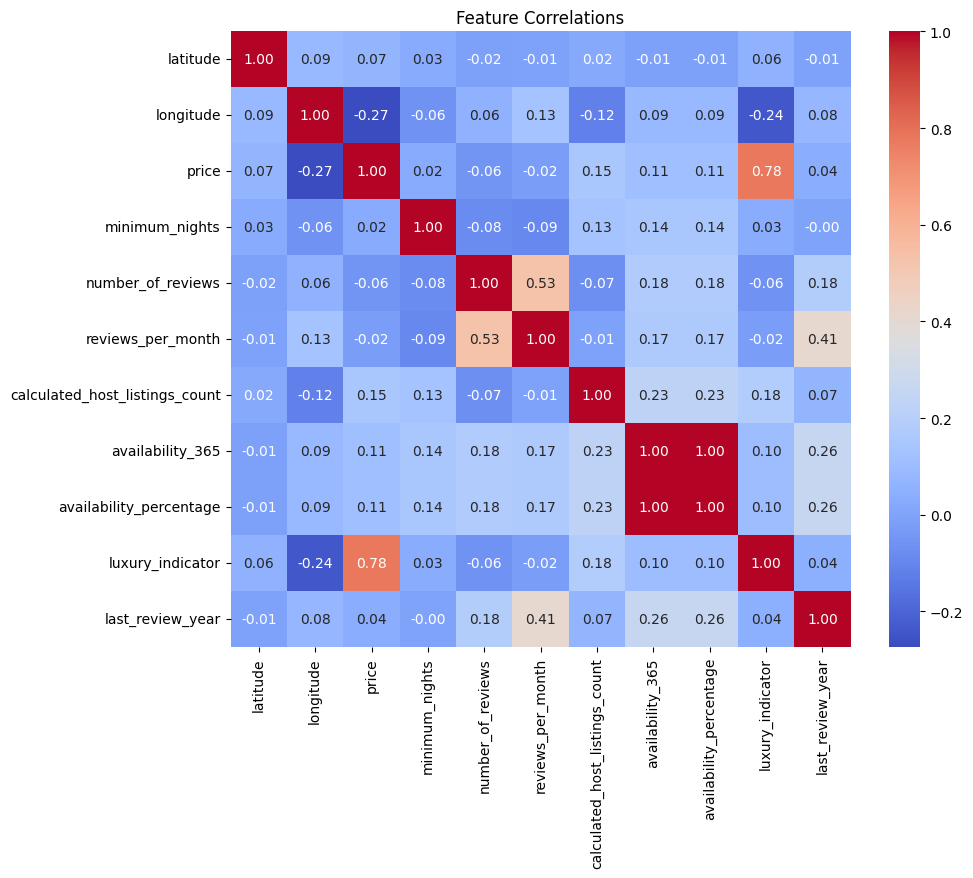

In [24]:
# Heatmap of correlations
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlations')
plt.show()

## 5. Model Building

- Split the dataset into training and testing sets.
- Train models:
- Evaluate the models using metrics like RMSE and R-squared.


In [25]:
# Split dataset
X = df.drop('price', axis=1)
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
# Train Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [27]:
# Predict and evaluate
y_pred = rf.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Random Forest RMSE: {rmse:.2f}")
print(f"Random Forest R-squared: {r2:.2f}")

Random Forest RMSE: 0.24
Random Forest R-squared: 0.70


## 6. Feature Importance Analysis

- Use Random Forest’s feature importance attribute.
- Visualize feature importance using bar charts.
- Interpret which features are most critical for accurate price prediction.

In [28]:
non_dummy = [col for col in X.columns if col not in dummy_cols]
non_dummy

['latitude',
 'longitude',
 'minimum_nights',
 'number_of_reviews',
 'reviews_per_month',
 'calculated_host_listings_count',
 'availability_365',
 'availability_percentage',
 'luxury_indicator',
 'last_review_year']

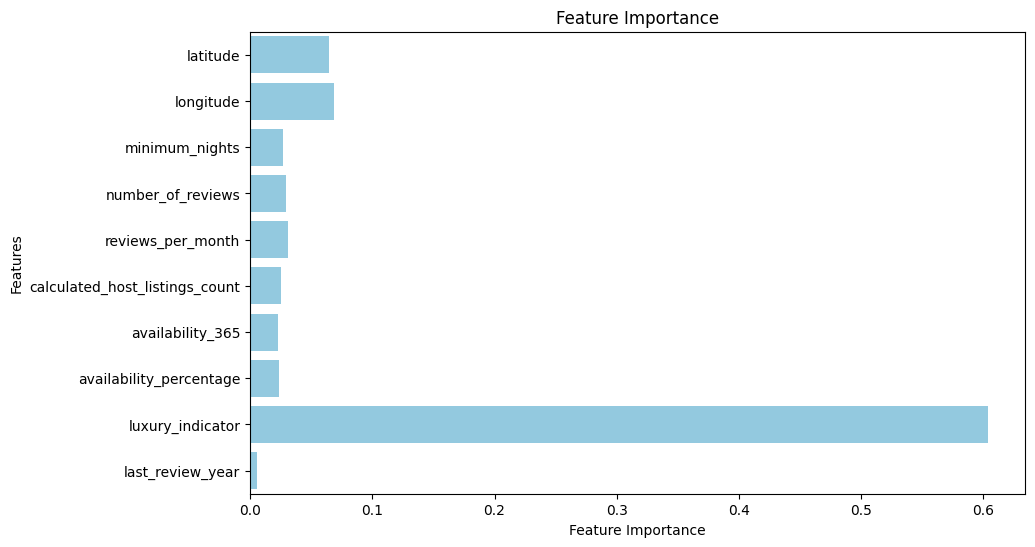

In [29]:
# Extract feature importance
importance = rf.feature_importances_
importance = importance[X.columns.isin(non_dummy)]

# Visualize feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=importance, y=non_dummy, color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.show()

In our case, we created a variable "luxury_indicator" using the price feature so we are leaking the target variable here. We will rerun the model removing this variable

In [30]:
#Dropping the luxury_indicator
df = df.drop(['luxury_indicator'], axis=1)
df

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,room_type_Private room,room_type_Shared room,...,neighbourhood_Woodhaven,neighbourhood_Woodlawn,neighbourhood_Woodrow,neighbourhood_Woodside,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,availability_percentage,last_review_year
0,-1.493849,-0.437652,-0.015493,-0.293996,-0.320414,0.210000,6,365,True,False,...,False,False,False,False,True,False,False,False,1.000000,2018
1,0.452436,-0.684639,0.300974,-0.293996,0.487665,0.380000,2,355,False,False,...,False,False,False,False,False,True,False,False,0.972603,2019
2,1.468399,0.222497,-0.011329,-0.196484,-0.522433,1.373221,1,365,True,False,...,False,False,False,False,False,True,False,False,1.000000,2019
3,-0.803398,-0.164450,-0.265335,-0.293996,5.538156,4.640000,1,194,False,False,...,False,False,False,False,True,False,False,False,0.531507,2019
4,1.275660,0.177216,-0.302811,0.144807,-0.320414,0.100000,1,0,False,False,...,False,False,False,False,False,True,False,False,0.000000,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,-0.924616,0.048089,-0.344452,-0.245240,-0.522433,1.373221,2,9,True,False,...,False,False,False,False,True,False,False,False,0.024658,2019
48891,-0.497141,0.411637,-0.469373,-0.147729,-0.522433,1.373221,2,36,True,False,...,False,False,False,False,True,False,False,False,0.098630,2019
48892,1.573480,0.075821,-0.157070,0.144807,-0.522433,1.373221,1,27,False,False,...,False,False,False,False,False,True,False,False,0.073973,2019
48893,0.523774,-0.843881,-0.406912,-0.293996,-0.522433,1.373221,6,2,False,True,...,False,False,False,False,False,True,False,False,0.005479,2019


## 6. Model Building by dropping Luxury Indicator

- Split the dataset into training and testing sets.
- Train models:
- Evaluate the models using metrics like RMSE and R-squared.


In [31]:
# Split dataset
X = df.drop('price', axis=1)
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
# Train Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [33]:
# Predict and evaluate
y_pred = rf.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Random Forest RMSE: {rmse:.2f}")
print(f"Random Forest R-squared: {r2:.2f}")

Random Forest RMSE: 0.31
Random Forest R-squared: 0.49


Feature Importance by droppping the luxury_indicator

In [34]:
non_dummy = [col for col in X.columns if col not in dummy_cols]
non_dummy

['latitude',
 'longitude',
 'minimum_nights',
 'number_of_reviews',
 'reviews_per_month',
 'calculated_host_listings_count',
 'availability_365',
 'availability_percentage',
 'last_review_year']

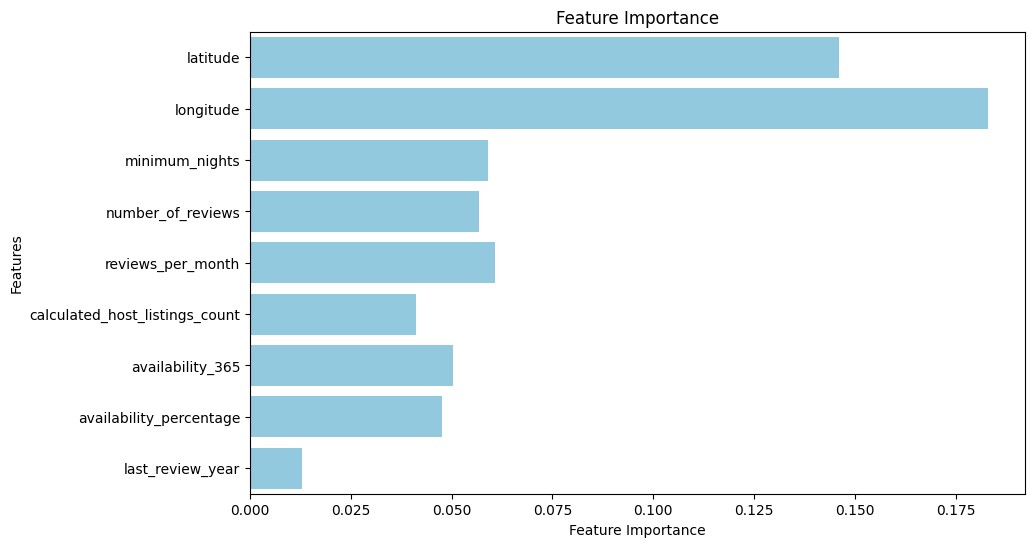

In [35]:
# Extract feature importance
importance = rf.feature_importances_
importance = importance[X.columns.isin(non_dummy)]

# Visualize feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=importance, y=non_dummy, color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.show()

It indicates that the latitude, longitude and reviews are the important features.

## 7. Conclusion


## 8. Other Models

### 8.1 Importing and Fitting

In [36]:
X_train.describe()

,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,availability_percentage,last_review_year
count,38722.000000,38722.000000,38722.000000,38722.000000,38722.000000,38722.000000,38722.000000,38722.000000,38722.000000
mean,0.001191,0.005395,-0.000566,0.001551,1.372379,7.136124,111.471024,0.305400,2018.432106
std,0.999649,0.993856,0.983097,0.996553,1.504903,32.792769,131.060661,0.359070,1.091747
min,-4.081072,-6.331760,-0.293996,-0.522433,0.010000,1.000000,0.000000,0.000000,2011.000000
25%,-0.710971,-0.664653,-0.293996,-0.499987,0.270000,1.000000,0.000000,0.000000,2018.000000
50%,-0.110012,-0.070530,-0.196484,-0.410200,1.220000,1.000000,43.000000,0.117808,2019.000000
75%,0.626287,0.349565,-0.098973,0.016286,1.590000,2.000000,222.000000,0.608219,2019.000000
max,3.376357,5.181954,48.413144,13.596494,58.500000,327.000000,365.000000,1.000000,2019.000000


In [37]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor

# Define the models to evaluate
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Decision Tree': DecisionTreeRegressor(),
    'Support Vector Regressor': SVR(),
    'Gradient Boosting': GradientBoostingRegressor()
}

# Evaluate each model
model_performance = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    model_performance[model_name] = mse
    print(f"{model_name} MSE: {mse:.2f}")


Linear Regression MSE: 4173825002871.82
Ridge Regression MSE: 0.12
Lasso Regression MSE: 0.19
Decision Tree MSE: 0.19
Support Vector Regressor MSE: 0.20
Gradient Boosting MSE: 0.10


### 8.2 Evaluating

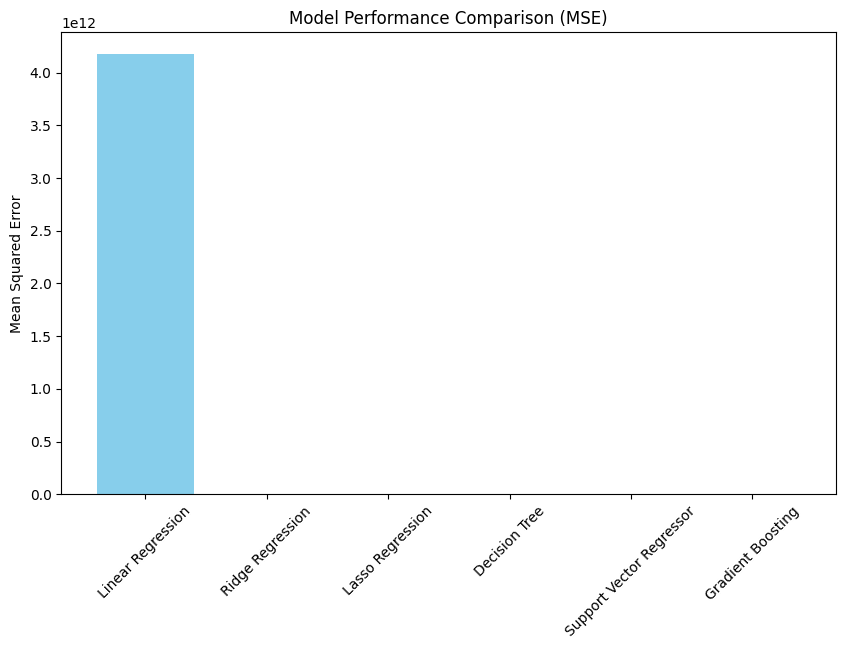

In [38]:
# Visualize the MSE of each model
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(model_performance.keys(), model_performance.values(), color='skyblue')
plt.title('Model Performance Comparison (MSE)')
plt.ylabel('Mean Squared Error')
plt.xticks(rotation=45)
plt.show()